In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [122]:
def generate_permutation() -> np.ndarray:
    return np.random.permutation(256)

In [68]:
generate_permutation()[0]

184

In [69]:
def Noise2D(x, y):
    global permutation
    X = math.floor(x) & 255
    Y = math.floor(y) & 255
    
    xf = x - math.floor(x)
    yf = y - math.floor(y)
    
    topRight = np.array([xf - 1.0, yf - 1.0])
    topLeft = np.array([xf, yf - 1.0])
    bottomRight = np.array([xf - 1.0, yf])
    bottomLeft = np.array([xf, yf])
    
    
    vTopRight = permutation[(permutation[X+1] + Y+1) & 255]
    vTopLeft = permutation[(permutation[X] + Y+1) & 255]
    vBottomRight = permutation[(permutation[X+1] + Y) & 255]
    vBottomLeft = permutation[(permutation[X] + Y) & 255]
    
    dotTopRight = topRight.dot(get_constant_vector(vTopRight))
    dotTopLeft = topLeft.dot(get_constant_vector(vTopLeft))
    dotBottomRight = bottomRight.dot(get_constant_vector(vBottomRight))
    dotBottomLeft = bottomLeft.dot(get_constant_vector(vBottomLeft))
    
    u = fade(xf)
    v = fade(yf)
    
    return lerp(u, lerp(v, dotBottomLeft, dotTopLeft), lerp(v, dotBottomRight, dotTopRight))


In [70]:
def get_constant_vector(v: int) -> np.ndarray:
    h = v & 3
    if (h == 0):
        return np.array([1.0, 1.0])
    elif (h == 1):
        return np.array([-1.0, 1.0])
    elif (h ==2):
        return np.array([-1.0, -1.0])
    else:
        return np.array([1.0, -1.0])

In [71]:
def fade(val: float) -> float:
    return ((6*val - 15)*val +10) * val**3


In [72]:
def lerp(u: float, a1: np.ndarray, a2: np.ndarray) -> np.ndarray:
    return a1 + u*(a2-a1)

In [142]:
w = 1200
h = 1000
terrain = np.ndarray((w, h, 3),dtype=np.uint8)

In [148]:
permutation = generate_permutation()
for y in range(w):
    for x in range(h):
        n = 0.0
        a = 1.0
        f = 0.005
        
        for octet in range(8):
            v = a * Noise2D(x*f, y*f)
            n += v
            a *= 0.5
            f *= 1.7
        
        n += 1.0
        n *= 0.5
        
        rgb = round(255 * n)
        
        if n < 0.5:  # Water
            terrain[y, x] = (0, 0, min(rgb * 2, 255))
        elif n < 0.52:  # Shore
            terrain[y, x] = (round(rgb * 0.7), min(rgb, 255), min(rgb * 0.3, 255))
        elif n < 0.6:  # Grassland
            terrain[y, x] = (round(rgb * 0.3), min(rgb, 255), round(rgb * 0.3))
        elif n < 0.75:  # Forest
            terrain[y, x] = (0, min(round(rgb * 1.2), 255), 0)
        elif n < 0.93:  # Mountain
            terrain[y, x] = (round(rgb * 0.5), round(rgb * 0.4), round(rgb * 0.3))
        else:  # Snow
            terrain[y, x] = (min(rgb, 255), min(rgb, 255), min(rgb, 255))

/tmp/ipykernel_10122/4281696765.py:20: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  terrain[y, x] = (0, 0, min(rgb * 2, 255))


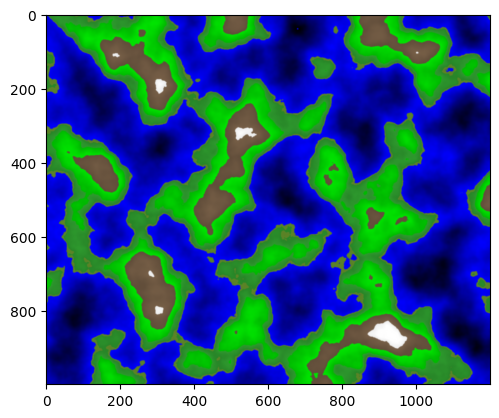

In [149]:
plt.imshow(np.transpose(terrain, (1, 0, 2)), interpolation='gaussian')
plt.show()

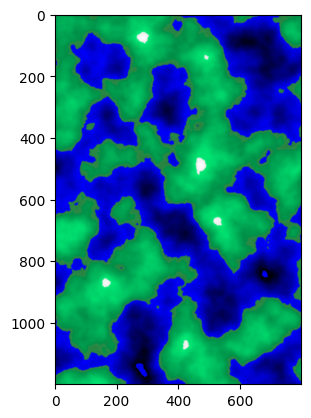

In [106]:
plt.imshow(terrain, interpolation='gaussian')
plt.show()